In [1]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pylab
import seaborn
import pandas as pd
import datetime

# 设置绘图参数
%matplotlib inline
pylab.rcParams['figure.figsize'] = (16, 8)

# 数据文件地址
filename = "./presidential_polls.csv"

# 数据预处理

In [2]:
# 读取文件到一个DataFrame
df = pd.read_csv(filename)
df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/25/2016,10/31/2016,Google Consumer Surveys,B,...,42.64140,40.86509,5.675099,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,47940,74999,11/1/16,15:09:38 1 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,43.29659,44.72984,3.401513,NaN,NaN,http://www.langerresearch.com/wp-content/uploa...,47881,74936,11/1/16,15:09:38 1 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Virginia,10/27/2016,10/30/2016,ABC News/Washington Post,A+,...,46.29779,40.72604,6.401513,NaN,NaN,https://www.washingtonpost.com/local/virginia-...,47880,74934,11/1/16,15:09:38 1 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Florida,10/20/2016,10/24/2016,SurveyUSA,A,...,46.35931,45.30585,1.777730,NaN,NaN,http://www.baynews9.com/content/news/baynews9/...,47465,74252,10/25/16,15:09:38 1 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,U.S.,10/20/2016,10/25/2016,Pew Research Center,B+,...,45.32744,42.20888,3.618320,NaN,NaN,http://www.people-press.org/2016/10/27/as-elec...,47616,74519,10/27/16,15:09:38 1 Nov 2016


In [3]:
# 查看列名
print df.columns

Index([u'cycle', u'branch', u'type', u'matchup', u'forecastdate', u'state',
       u'startdate', u'enddate', u'pollster', u'grade', u'samplesize',
       u'population', u'poll_wt', u'rawpoll_clinton', u'rawpoll_trump',
       u'rawpoll_johnson', u'rawpoll_mcmullin', u'adjpoll_clinton',
       u'adjpoll_trump', u'adjpoll_johnson', u'adjpoll_mcmullin',
       u'multiversions', u'url', u'poll_id', u'question_id', u'createddate',
       u'timestamp'],
      dtype='object')


In [4]:
# 使用的列名
use_columns = ['enddate', 'rawpoll_clinton', 'rawpoll_trump', 'adjpoll_clinton', 'adjpoll_trump']

# 获取相应的DataFrame
df = df[use_columns]
df.head()

,enddate,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump
0,10/31/2016,37.69,35.07,42.64140,40.86509
1,10/30/2016,45.00,46.00,43.29659,44.72984
2,10/30/2016,48.00,42.00,46.29779,40.72604
3,10/24/2016,48.00,45.00,46.35931,45.30585
4,10/25/2016,46.00,40.00,45.32744,42.20888


In [5]:
# 查看变量类别
df.dtypes

enddate             object
rawpoll_clinton    float64
rawpoll_trump      float64
adjpoll_clinton    float64
adjpoll_trump      float64
dtype: object

In [6]:
# 处理日期格式数据
enddates = df['enddate'].values.tolist()
len(enddates)

10236

In [7]:
# 将日期字符串格式统一为 'YYYY/mm/dd'
enddates = [enddate.replace("-", "/") for enddate in enddates]
date_lst = [datetime.datetime.strptime(endtime, "%m/%d/%Y") for endtime in enddates]

date_lst[0:5]

[datetime.datetime(2016, 10, 31, 0, 0),
 datetime.datetime(2016, 10, 30, 0, 0),
 datetime.datetime(2016, 10, 30, 0, 0),
 datetime.datetime(2016, 10, 24, 0, 0),
 datetime.datetime(2016, 10, 25, 0, 0)]

## 构造年份-月份列表

In [8]:
month_lst = ['%d-%02d' % (date_obj.year, date_obj.month) for date_obj in date_lst]
months = np.unique(month_lst)
print type(months)
print months

<type 'numpy.ndarray'>
['2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05'
 '2016-06' '2016-07' '2016-08' '2016-09' '2016-10']


In [9]:
# 清洗后的数据
df['enddate'] = month_lst
df.head()

,enddate,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump
0,2016-10,37.69,35.07,42.64140,40.86509
1,2016-10,45.00,46.00,43.29659,44.72984
2,2016-10,48.00,42.00,46.29779,40.72604
3,2016-10,48.00,45.00,46.35931,45.30585
4,2016-10,46.00,40.00,45.32744,42.20888


# 数据分析
## 统计民意投票支持率
### Hilary Clinton & Donald Trump

In [10]:
# 计算平均值函数
def get_avg(array):
    length = len(array)
    float_array = np.array(array, np.float64)
    return np.sum(array) / length

In [11]:
# 按月统计民调支持率
results = pd.DataFrame(np.zeros((12,4)), index=months, columns=use_columns[1:])
for month in months:
    # Hilary Clinton
    results.loc[month, "rawpoll_clinton"] = get_avg(df.loc[df['enddate'] == month, "rawpoll_clinton"])
    results.loc[month, "adjpoll_clinton"] = get_avg(df.loc[df['enddate'] == month, "adjpoll_clinton"])
    # Donald Trump
    results.loc[month, "rawpoll_trump"] = get_avg(df.loc[df['enddate'] == month, "rawpoll_trump"])
    results.loc[month, "adjpoll_trump"] = get_avg(df.loc[df['enddate'] == month, "adjpoll_trump"])
    
results

,rawpoll_clinton,rawpoll_trump,adjpoll_clinton,adjpoll_trump
2015-11,42.666667,43.293333,42.593290,43.051756
2015-12,44.600000,38.558333,42.937564,37.860388
2016-01,43.966038,39.320755,42.184695,39.297911
2016-02,44.542857,39.673016,42.758582,40.513853
2016-03,46.216471,37.787059,44.235241,39.268639
2016-04,47.297674,36.163953,46.010163,38.132311
2016-05,42.976531,39.281633,43.327604,41.431326
2016-06,43.208667,36.783333,45.012639,40.351423
2016-07,41.507389,39.555722,43.788596,42.032695
2016-08,40.747548,37.634221,43.479207,42.032730


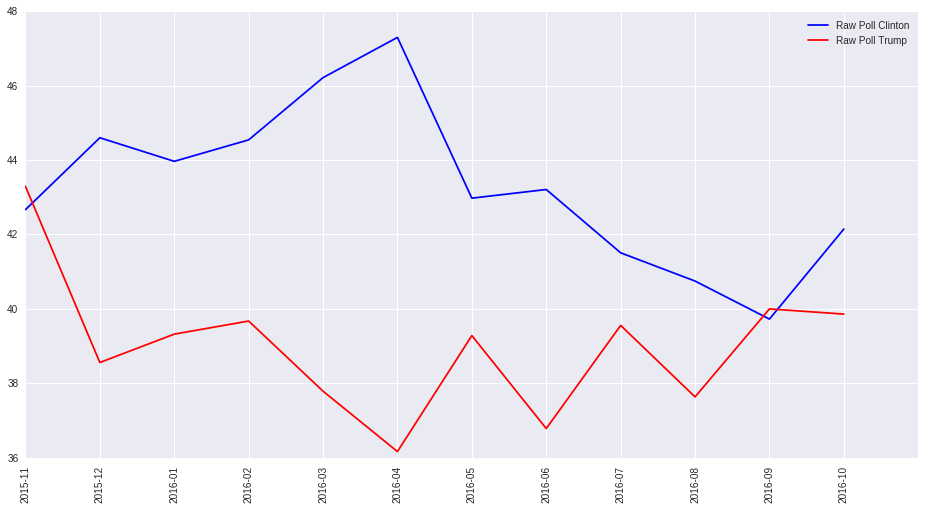

In [13]:
# 原始民调走势图
plt.plot(results['rawpoll_clinton'].values, 'b', label='Raw Poll Clinton')
plt.plot(results['rawpoll_trump'].values, 'r', label='Raw Poll Trump')
plt.xticks(range(12), months, rotation='vertical')
plt.legend()

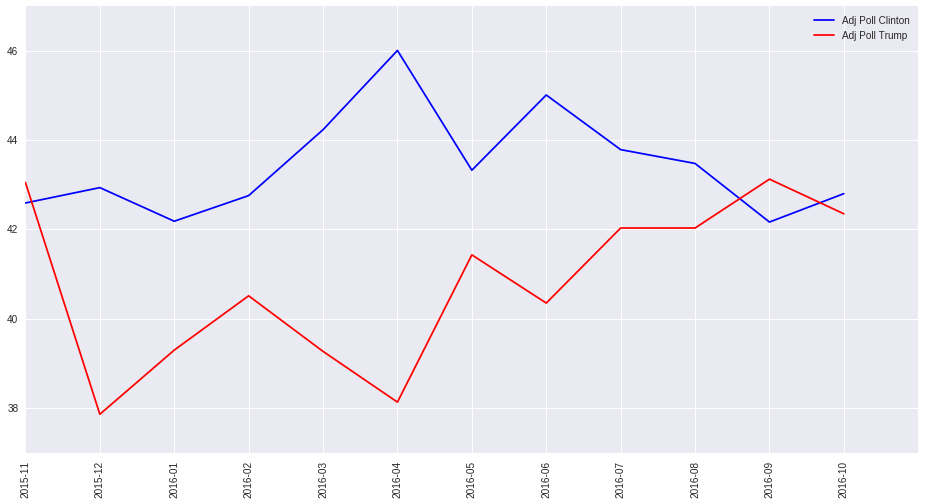

In [14]:
# 调整后民调走势图
plt.plot(results['adjpoll_clinton'].values, 'b', label='Adj Poll Clinton')
plt.plot(results['adjpoll_trump'].values, 'r', label='Adj Poll Trump')
plt.xticks(range(12), months, rotation='vertical')
plt.legend()